<a href="https://colab.research.google.com/github/nisaakan/dsa-project/blob/main/DSA210_Project_Data_Code_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA210 Project - Mental Health & Technology Usage Project

Data Collection

*   In this project, the dataset "Mental Health and Technology Usage 2024" was uploaded locally as a .csv file. It was loaded using Python’s pandas library to prepare it for analysis, including cleaning,
visualization, and modeling.
*   Source: Kaggle(https://www.kaggle.com/datasets/waqi786/mental-health-and-technology-usage-dataset)







In [ ]:
# File upload (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving mental_health_and_technology_usage_2024.csv to mental_health_and_technology_usage_2024 (3).csv


In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load CSV file
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)


# Data Overview
print("First 5 rows of the dataset:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nDescriptive Statistics:")
display(data.describe())


# Missing Value Handling
print("\nMissing value count:")
print(data.isnull().sum())

for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

First 5 rows of the dataset:


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  objec

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000



Missing value count:
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


<ipython-input-20-a108a8c648a9>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-20-a108a8c648a9>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Feature Engineering
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_map)
data['Avg_Tech_Screen'] = (data['Technology_Usage_Hours'] + data['Screen_Time_Hours']) / 2

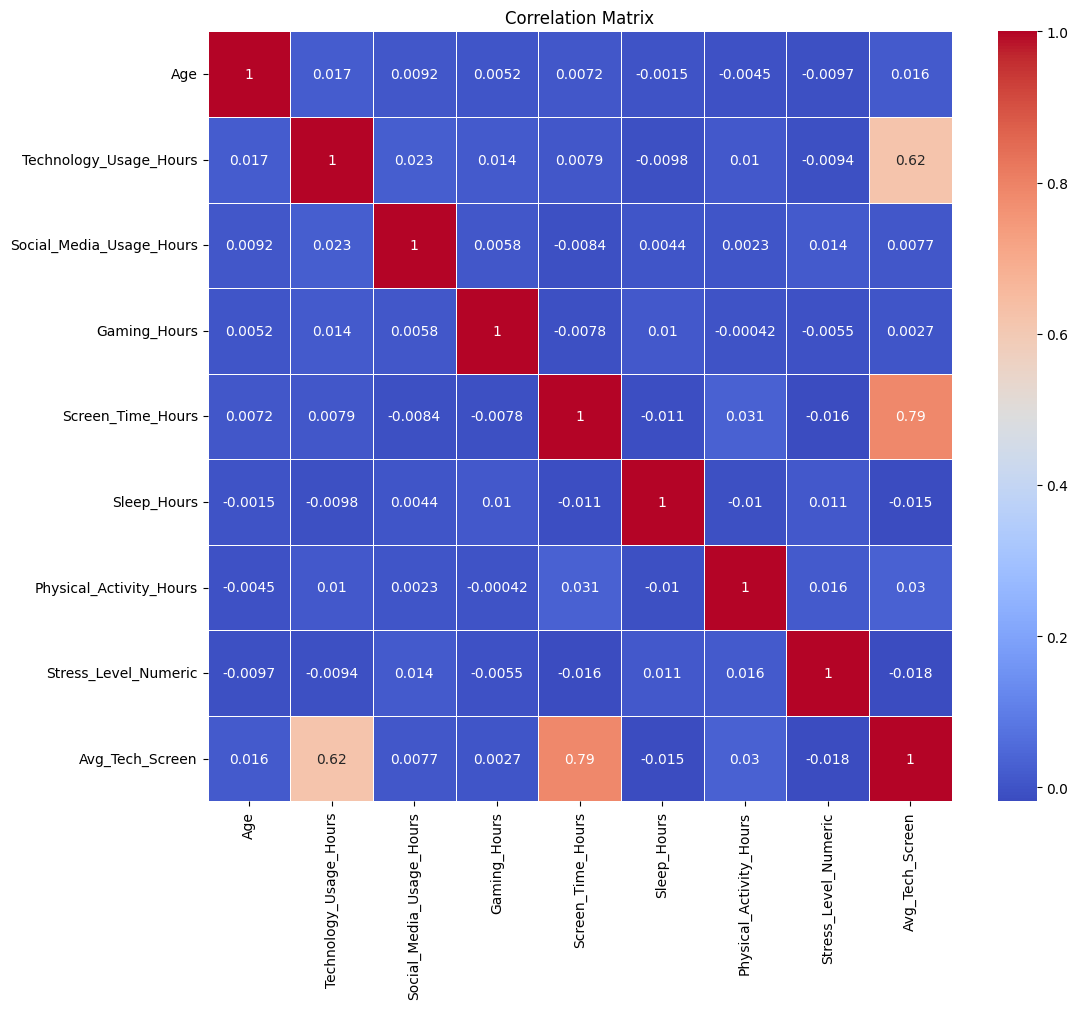

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

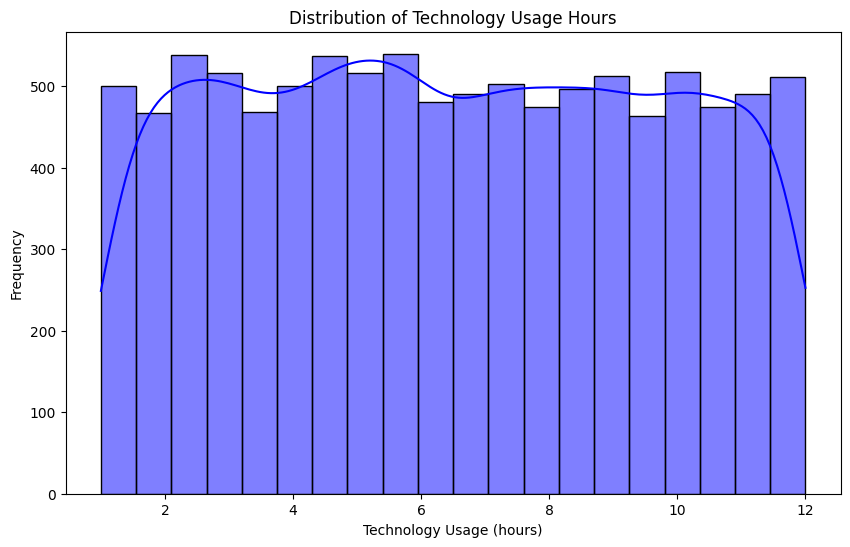

In [ ]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Technology_Usage_Hours'], bins=20, kde=True, color='blue')
plt.title('Distribution of Technology Usage Hours')
plt.xlabel('Technology Usage (hours)')
plt.ylabel('Frequency')
plt.show()

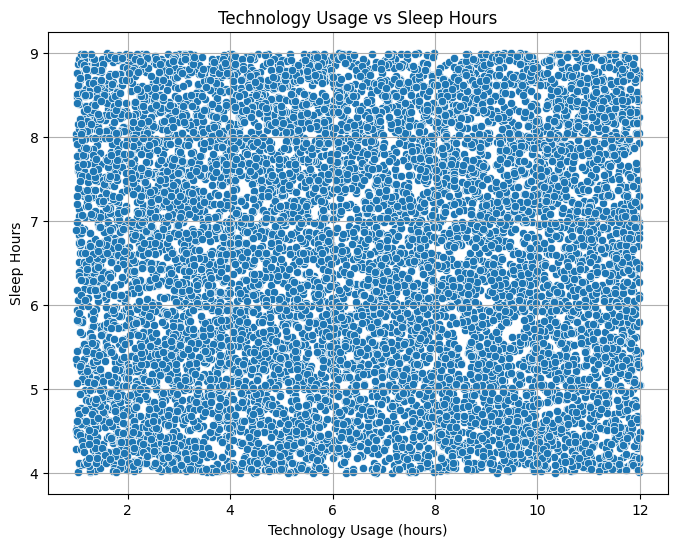

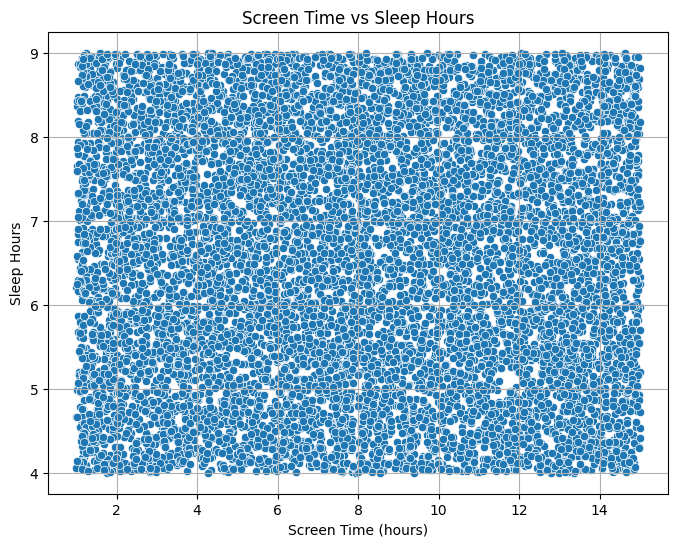

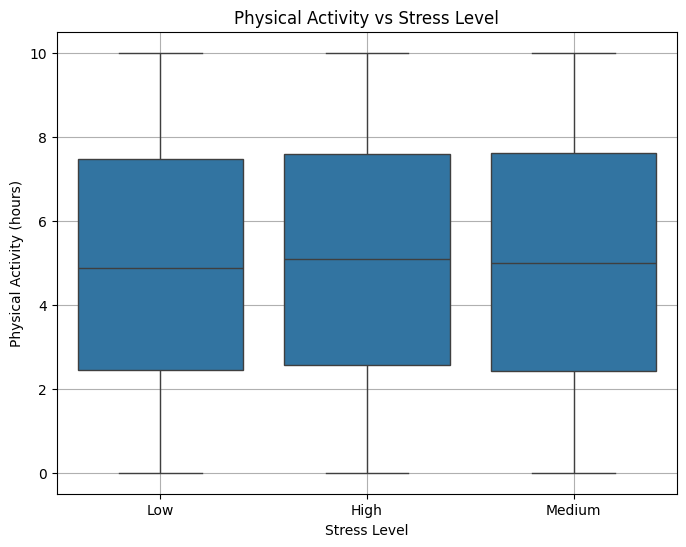

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Technology_Usage_Hours', y='Sleep_Hours', data=data)
plt.title('Technology Usage vs Sleep Hours')
plt.xlabel('Technology Usage (hours)')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Screen_Time_Hours', y='Sleep_Hours', data=data)
plt.title('Screen Time vs Sleep Hours')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Sleep Hours')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours', data=data)
plt.title('Physical Activity vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity (hours)')
plt.grid(True)
plt.show()


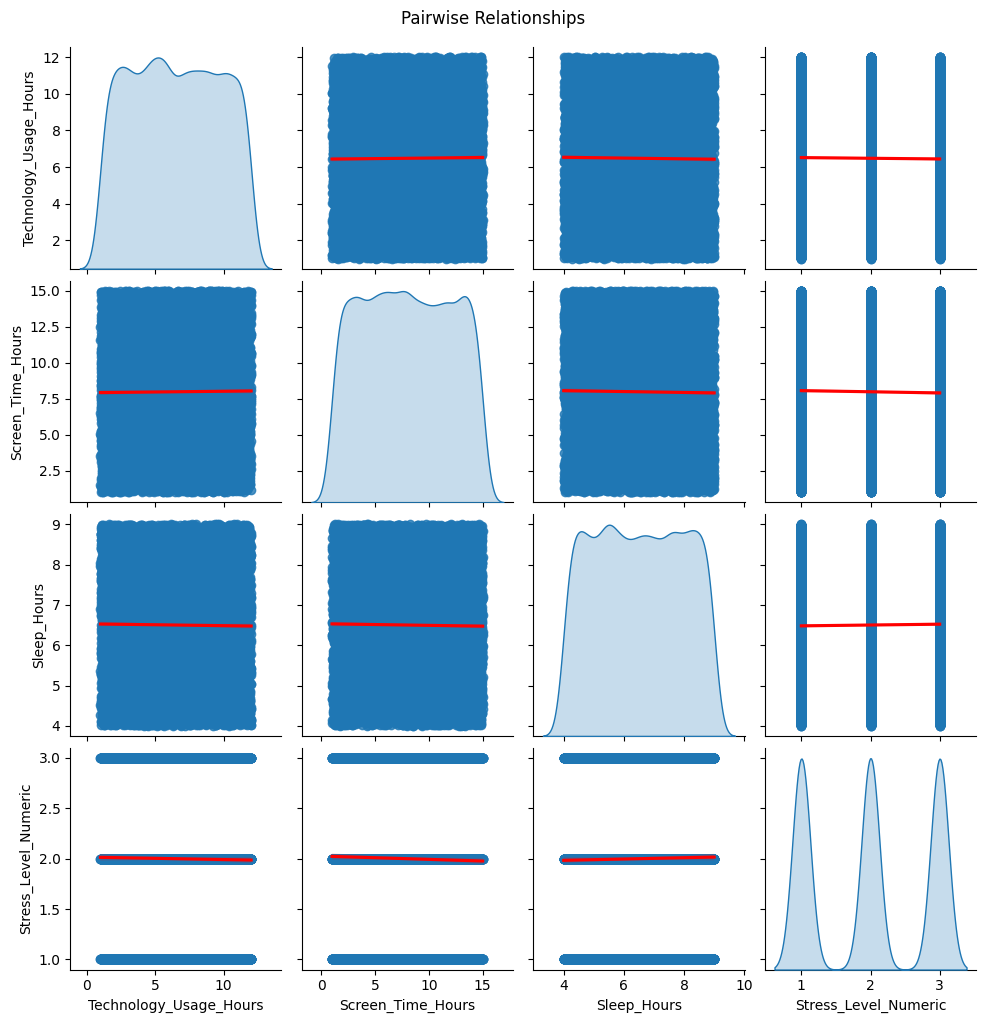

In [ ]:
# Pairplot
sns.pairplot(data[['Technology_Usage_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Stress_Level_Numeric']],
             diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [ ]:
# Statistical Analysis (OLS Regression)
X = sm.add_constant(data['Screen_Time_Hours'])
y = data['Sleep_Hours']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Sleep_Hours   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.250
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.264
Time:                        13:44:08   Log-Likelihood:                -17910.
No. Observations:               10000   AIC:                         3.582e+04
Df Residuals:                    9998   BIC:                         3.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.5327      0.03

In [ ]:
# Pearson Correlation
corr, p_val = pearsonr(data['Screen_Time_Hours'], data['Sleep_Hours'])
print(f"\nPearson Correlation: {corr:.2f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Statistically significant relationship.")
else:
    print("No statistically significant relationship.")


Pearson Correlation: -0.01
P-Value: 0.2636
No statistically significant relationship.


In [ ]:
# Hypothesis Testing Explanation
print("\n--- Hypothesis Testing Explanation ---")
print("Null Hypothesis (H0): There is no correlation between screen time and sleep hours.")
print("Alternative Hypothesis (H1): There is a correlation between screen time and sleep hours.")
print(f"Result: Pearson correlation = {corr:.2f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("We reject the null hypothesis. This suggests a statistically significant relationship.")
else:
    print("We fail to reject the null hypothesis. No statistically significant relationship was found.")



--- Hypothesis Testing Explanation ---
Null Hypothesis (H0): There is no correlation between screen time and sleep hours.
Alternative Hypothesis (H1): There is a correlation between screen time and sleep hours.
Result: Pearson correlation = -0.01, p-value = 0.2636
We fail to reject the null hypothesis. No statistically significant relationship was found.


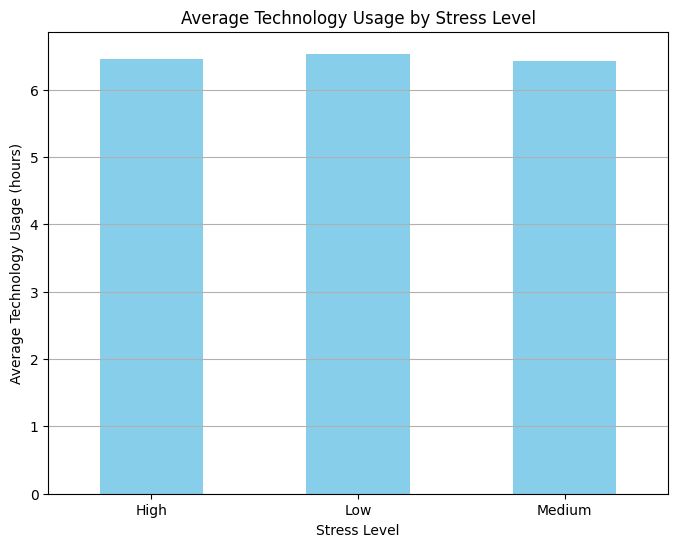

In [ ]:
# Grouped Analysis
stress_usage = data.groupby('Stress_Level')['Technology_Usage_Hours'].mean()
plt.figure(figsize=(8, 6))
stress_usage.plot(kind='bar', color='skyblue')
plt.title('Average Technology Usage by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Technology Usage (hours)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



ML - Mean Squared Error (MSE): 2.11


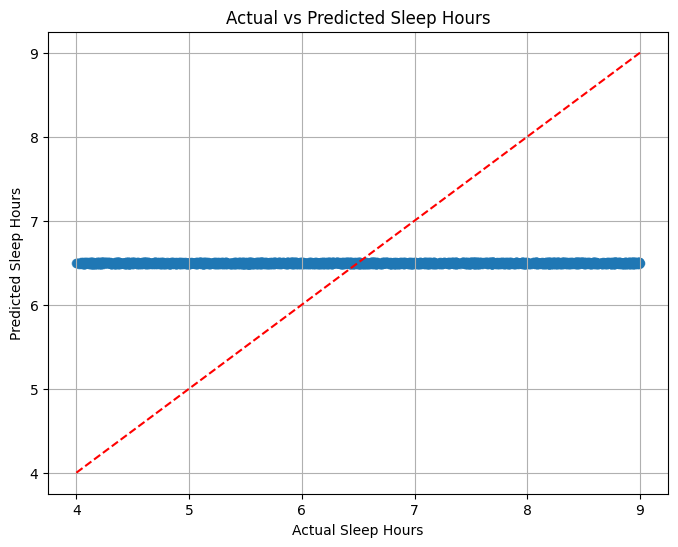

In [ ]:
# Machine Learning - Regression
X_ml = data[['Technology_Usage_Hours']]
y_ml = data['Sleep_Hours']
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nML - Mean Squared Error (MSE): {mse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_ml.min(), y_ml.max()], [y_ml.min(), y_ml.max()], 'r--')
plt.title("Actual vs Predicted Sleep Hours")
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.grid(True)
plt.show()


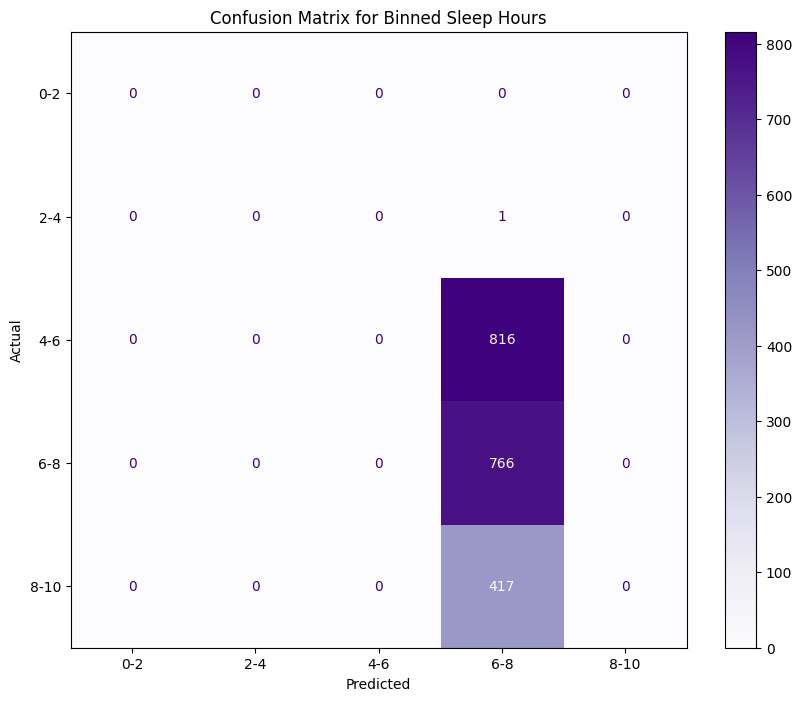

In [ ]:
# Classification - Confusion Matrix
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
y_test_clipped = pd.cut(y_test, bins=bins, labels=labels)
y_pred_clipped = pd.cut(y_pred, bins=bins, labels=labels)

# Convert to numeric
y_test_bins_numeric = pd.Categorical(y_test_clipped).codes
y_pred_bins_numeric = pd.Categorical(y_pred_clipped).codes

# Confusion matrix
conf_mat = confusion_matrix(y_test_bins_numeric, y_pred_bins_numeric, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Purples', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix for Binned Sleep Hours")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()